<a href="https://colab.research.google.com/github/geun-hyoung/Machine-Learning-and-Artificial-Intelligence/blob/main/ex_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --no-check-certificate \
https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
-O /tmp/cats_and_dogs_filtered.zip

--2022-09-14 13:16:37--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.45.112, 142.250.188.48, 172.253.62.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.45.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   120MB/s    in 0.5s    

2022-09-14 13:16:38 (120 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

In [3]:
# 기본 경로
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# 훈련에 사용되는 고양이/개 이미지 경로
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
print(train_cats_dir)
print(train_dogs_dir)

# 테스트에 사용되는 고양이/개 이미지 경로
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
print(validation_cats_dir)
print(validation_dogs_dir)

/tmp/cats_and_dogs_filtered/train/cats
/tmp/cats_and_dogs_filtered/train/dogs
/tmp/cats_and_dogs_filtered/validation/cats
/tmp/cats_and_dogs_filtered/validation/dogs


In [4]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print(train_cat_fnames[:5])
print(train_dog_fnames[:5])

['cat.256.jpg', 'cat.685.jpg', 'cat.582.jpg', 'cat.100.jpg', 'cat.792.jpg']
['dog.577.jpg', 'dog.172.jpg', 'dog.878.jpg', 'dog.72.jpg', 'dog.290.jpg']


In [5]:
print('Total training cat images :', len(os.listdir(train_cats_dir)))
print('Total training dog images :', len(os.listdir(train_dogs_dir)))

print('Total validation cat images :', len(os.listdir(validation_cats_dir)))
print('Total validation dog images :', len(os.listdir(validation_dogs_dir)))

Total training cat images : 1000
Total training dog images : 1000
Total validation cat images : 500
Total validation dog images : 500


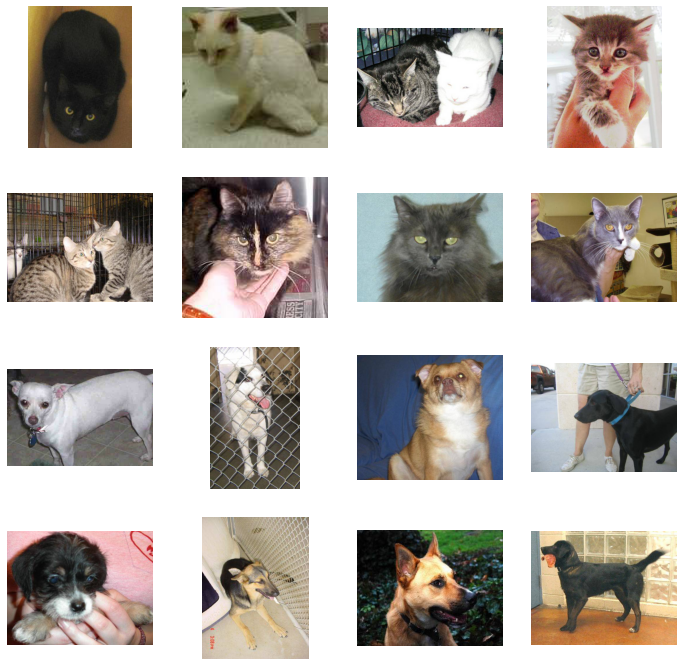

In [6]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows, ncols = 4, 4
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*3, nrows*3)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname)
                for fname in train_cat_fnames[ pic_index-8:pic_index]]

next_dog_pix = [os.path.join(train_dogs_dir, fname)
                for fname in train_dog_fnames[ pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [7]:
import tensorflow as tf


model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [8]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
            loss='binary_crossentropy',
            metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory(train_dir,
                                                  batch_size=20,
                                                  class_mode='binary',
                                                  target_size=(150, 150))
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                       batch_size=20,
                                                       class_mode  = 'binary',
                                                       target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [10]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=100,
                    epochs=20,
                    validation_steps=50,
                    verbose=2)

Epoch 1/20
100/100 - 55s - loss: 0.9302 - accuracy: 0.5510 - val_loss: 0.6544 - val_accuracy: 0.6420 - 55s/epoch - 551ms/step
Epoch 2/20
100/100 - 52s - loss: 0.6525 - accuracy: 0.6325 - val_loss: 0.6574 - val_accuracy: 0.5940 - 52s/epoch - 524ms/step
Epoch 3/20
100/100 - 53s - loss: 0.5566 - accuracy: 0.7120 - val_loss: 0.6198 - val_accuracy: 0.6750 - 53s/epoch - 534ms/step
Epoch 4/20
100/100 - 52s - loss: 0.4635 - accuracy: 0.7795 - val_loss: 0.6083 - val_accuracy: 0.7050 - 52s/epoch - 521ms/step
Epoch 5/20
100/100 - 52s - loss: 0.3886 - accuracy: 0.8250 - val_loss: 0.6706 - val_accuracy: 0.6960 - 52s/epoch - 524ms/step
Epoch 6/20
100/100 - 54s - loss: 0.2832 - accuracy: 0.8750 - val_loss: 0.6782 - val_accuracy: 0.6900 - 54s/epoch - 542ms/step
Epoch 7/20
100/100 - 53s - loss: 0.2001 - accuracy: 0.9145 - val_loss: 1.3228 - val_accuracy: 0.6570 - 53s/epoch - 531ms/step
Epoch 8/20
100/100 - 53s - loss: 0.1380 - accuracy: 0.9475 - val_loss: 0.9558 - val_accuracy: 0.6940 - 53s/epoch - 534

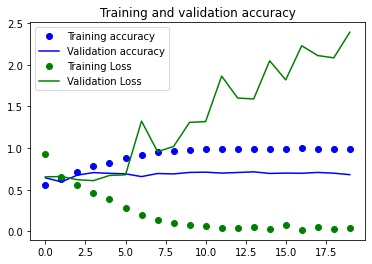

<Figure size 432x288 with 0 Axes>

In [13]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

# plt.plot(epochs, loss, 'go', label='Training Loss')
# plt.plot(epochs, val_loss, 'g', label='Validation Loss')
# plt.title('Training and validation loss')
# plt.legend()

plt.show()

In [19]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():

  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))

  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

  print(classes[0])

  if classes[0]>0:
    print(fn + " 강아지! ")
  else:
    print(fn + " 고양이! ")

Saving 화면 캡처 2022-09-14 225004.jpg to 화면 캡처 2022-09-14 225004.jpg
[0.]
화면 캡처 2022-09-14 225004.jpg 고양이! 


In [ ]:
from tensorflow import keras
from keras.datasets import cifar10
import numpy as np

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(keras.layers.MaxPooling2D(2, 2))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(2, 2))
model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          3

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', metrics='accuracy')

In [ ]:
history = model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 73s 46ms/step - loss: 1.5401 - accuracy: 0.4363
Epoch 2/5
1563/1563 [==============================] - 71s 46ms/step - loss: 1.2124 - accuracy: 0.5673
Epoch 3/5
1563/1563 [==============================] - 72s 46ms/step - loss: 1.0810 - accuracy: 0.6162
Epoch 4/5
1563/1563 [==============================] - 71s 45ms/step - loss: 0.9956 - accuracy: 0.6501
Epoch 5/5
1563/1563 [==============================] - 71s 45ms/step - loss: 0.9304 - accuracy: 0.6706


In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
print("loss = ", loss)
print("accuracy = ", accuracy)

313/313 [==============================] - 4s 13ms/step - loss: 0.8981 - accuracy: 0.6833
loss =  0.8980749249458313
accuracy =  0.6833000183105469


In [ ]:
test_batch = x_test[:2]

In [ ]:
preds = model.predict(test_batch)
print("preds =", preds)
print(np.argmax(preds[0]))
print(np.argmax(preds[1]))

preds = [[3.95651069e-03 2.97071449e-02 1.62804928e-02 5.29489398e-01
  5.14899846e-03 2.49647647e-01 7.92647898e-02 9.56154801e-03
  6.67436346e-02 1.01999175e-02]
 [1.63390543e-02 1.13553889e-01 1.66950322e-05 1.37255229e-05
  9.07879348e-06 4.83034682e-07 1.08541940e-06 9.80211752e-08
  8.63885224e-01 6.18063658e-03]]
3
8
